<img src="Images/IMG-Wine-Alcohol_Banner-English.png" alt="Title Banner" style="display: block; margin-left: auto; margin-right: auto; width: 100%">

---
The class of wine can be found in the notebook "Classification of Wine". But sometimes other properties of the wine are of interest which cannot be divided into a finite number of classes. In this notebook we therefore deal with the prediction of the alcohol content of wine using regression analysis.

<img src="Images/IMG-sklearn-logo.png" alt="Title Banner" style="float:right; display: block; margin-left: auto; margin-right: auto; width: 30%">

For this purpose we will use some regression models and other functions from the Python package [```scikit-learn```](https://scikit-learn.org/stable/user_guide.html) (short: ```sklearn```). ``Sklearn`` is an extremely powerful framework that provides many machine learning methods with uniform interfaces so that you can try out different models quickly and easily. In the course of this notebook, you will become familiar with some of the functions and objects used in regression. In the notebook _"Classification of Wine"_ you will also work with ```sklearn```, but with a focus on the methods and objects for solving classification problems.

It is very recommended for both notebooks to always get further information about the objects used in the documentation and the User's Guide of ``sklearn`` in order to acquire a deeper understanding of the context.

## Content
<table style="width:256; border: 1px solid black; display: inline-block">
  <tr>
    <td  style="text-align:right" width=64px><img src="Images/IMG-csv-in.png" style="float:left"></td>
      <td style="text-align:left" width=128px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#import_data'>Importing data</a>
      </td>
  </tr>
  <tr>
    <td style="text-align:right"><img src="Images/IMG-magnifying-glass.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#analyze_data'>Analysing data</a>
      </td>
  </tr>
    <tr>
    <td style="text-align:right"><img src="Images/IMG-broom.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#clean_data'>Preprocessing data</a>
        </td>
    </tr>
    <tr>
    <td style="text-align:right"><img src="Images/IMG-gears.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#build_model'>Choosing a model</a>
        </td>
        <tr>
    <td style="text-align:right"><img src="Images/IMG-new-file-out.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#save_model'>Saving the model</a>
        </td>
  </tr>
</table>

**Note:** In this notebook random numbers are used at some point (e.g. the division into training and test sets). This can mean that some results are not exactly reproducible for you and that the relative ranking of the various regression models or the optimal values of some hyperparameters may end up slightly different. However, this does not change anything about the general procedure or the programming patterns.

---


<a id='import_data'></a><div><img src="Images/IMG-csv-in.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">1. Importing data</h2>
<p style="position: relative; top: 10px">
The data of the wines were collected as part of a <a href='#data_source'> scientific study </a> and the exact meaning of the individual characteristics can be found in the corresponding paper. The listed features are:

<table style="width:256; border: 1px solid black; display: inline-block">
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Fixed acidity</p>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Volatile acidity</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Citric acid</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Residual sugar</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Chlorides</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Free sulfur dioxide</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Total sulfur dioxide</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Density</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">pH</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Sulphates</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Alcohol</p>
    </tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Quality</p>
    </table>

<a id='data_source'></a><b>Source of the data:</b> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

</p>

We have two sets of data, one of which contains only red wines and the other only white wines. For this notebook, let's assume that the color of the wine has no influence on the result.

The first step is therefore to import and connect the two data sets. The data are located in ``Data/winequality-red.csv`` and ```Data/winequality-white.csv```.

In [4]:
import pandas as pd  # See Preprocessing/Lego-Sets/Lego Sets Preprocessing.ipynb for an introduction to Pandas

# Import datasets (pandas function: pd.read_csv() Attention: Semicolon is used as separator ';'!)
df_red = pd.read_csv("Data/winequality-red.csv", sep=";")
df_white = pd.read_csv("Data/winequality-white.csv", sep=";")
# Connect the datasets with pd.concat()
df = pd.concat([df_red, df_white])

<a id='analyze_data'></a><div><img src="Images/IMG-magnifying-glass.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px" >2. Analysing data</h2>
    
<p style="position: relative; top: 10px">
Next, let's take a closer look at the data. Do we need a feature conversion? Do values have to be filled? </p>

In [5]:
# Let's start with a bit of descriptive statistics (pandas function: describe()):
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


We note three important facts:

1. There are a total of 6497 wines for which we have data (__```count```__), at least there are as many entries in each column. Thus, we don't have to fill in any data fortunately!
2. All features are purely numerical. So we don't have to convert any data either!
3. The data are scaled very differently because the mean values (__```mean```__) and standard deviations (__```std```__) spread over several orders of magnitude.

It is therefore advisable to first standardize the columns individually so that they each have a mean value of 0 and a standard deviation of 1 (also called $z$-score normalization). This brings all the features into the same order of magnitude without simplifying the relative distribution.

So our roadmap for cleaning the data is clear:
- No converting or filling necessary
- Standardization of the data is recommended
---

<a id='clean_data'></a><div><img src="Images/IMG-broom.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">3. Preprocessing data</h2>
<p style="position: relative; top: 10px">
As stated above, we don't need to do any conversions or replacements, just standardize. </p>

However, before we carry out the standardization, we should first split the data into training and test sets so that we do not already use data during standardization that should actually be test data "unseen" by the model. To do this, we first divide the data set into the feature vector sequence $X$ and class label $y$.


In [6]:
## First we separate the entire data set into features and the characteristic to be predicted
X = df.drop(columns=['alcohol']) # All columns of df except 'alcohol'
y = df['alcohol'] # Only column 'alcohol'

Now comes the actual split in the train and test set, which we can do with the function [```train_test_split()```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from ```scikit-learn```.

In [21]:
# Import the function train_test_split from the sklearn module model_selection
from sklearn.model_selection import train_test_split

# Now use the train_test_split() function to get a holdout test set of 20% of the total data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we can determine the parameters for the standardization on the training set and execute them on training and test data. We could of course manually subtract the mean in each column and divide it by its standard deviation. But it is more elegant with the help of the object [```StandardScaler```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

In [22]:
# Import the StandardScaler object from the sklearn preprocessing module
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler() object
stdScaler = StandardScaler()

# Calculate the standardization parameters on the training set (!) X_train using the "fit()" function
stdScaler.fit(X_train)
# Apply the **same** standardization to the training and test data using the transform() method
X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)

---
<a id='build_model'></a><div><img src="Images/IMG-gears.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">4. Modellauswahl</h2>
<p style="position: relative; top: 10px">
Now we can try out the regression approaches known from the lecture one after the other to find the optimal model. </p>

The simplest approach to regression of the alcohol content known from the lecture is linear regression. For this purpose there is the object [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) in ```sklearn```, which allows a very simple implementation:

In [23]:
# Import the LinearRegression object from the linear_model module in the sklearn package
from sklearn.linear_model import LinearRegression

# Instantiate a model with the standard parameters
lr1_model = LinearRegression()
# Train ("Fit") the model on the training data X_train using the fit () method
lr1_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

You can check the quality of this regression model (and also every other model in ```sklearn```) on any data set with the method [```score()```](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score). For regression models, the standard metric used here is the coefficient of determination $R^2$ (see lecture).

In [24]:
# R^2 in training
train_score_lr1 = lr1_model.score(X_train, y_train)
# R^2 in the test
test_score_lr1 = lr1_model.score(X_test, y_test)
# Output of the performance measures
print("1st order linear regression - training: R² = {:.2f} Test: R² = {:.2f}".format(train_score_lr1, test_score_lr1))

1st order linear regression - training: R² = 0.80 Test: R² = 0.80


In the lecture you learned that one can assume different basis functions $\varphi(x)$ in linear regression. You can also use the ```LinearRegression``` object with any of the functions $\varphi(x)$. You have to carry out the transformation of the characteristics mediated by $\varphi(x)$ yourself. Hand over the new, transformed characteristics (i.e. the matrix $\Phi$ in the lecture) to the fit method of ```LinearRegression``` afterwards.

We will try that out here using the example of a polynomial basis function of the second degree:

\begin{align}
\varphi_1(x) &= x^1 \\
\varphi_2(x) &= x^2
\end{align}

The characteristics of first order ($x^1$) are already in the training data. We now have to add the second order features ($x^2$) manually by squaring the columns of the feature matrix:

In [25]:
import numpy as np # For the matrix operations

# The first-order feature matrix must be supplemented by the second-order features
X_2_train = np.concatenate([X_train, X_train ** 2], axis=1)

# Do the same for the test data
X_2_test = np.concatenate([X_test, X_test ** 2], axis=1)

The 2nd order features are not necessarily mean-free and have a variance different from 1. So we still have to standardize them:

In [26]:
# Instantiate a new standard scaler and "fit" it into the training data including the 2nd order
stdScaler_2 = StandardScaler().fit(X_2_train)

# Standardize the second-order training and test data
X_2_train = stdScaler_2.transform(X_2_train)
X_2_test = stdScaler_2.transform(X_2_test)

So now we can train a regression model for the features up to order 2:

In [27]:
# Instantiate a model with the standard parameters
lr2_model = LinearRegression()
# Train ("fit") the model on the training data X_2_train using the fit() method
lr2_model.fit(X_2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# R^2 in training
train_score_lr2 = lr2_model.score(X_2_train, y_train)
# R^2 in the test
test_score_lr2 = lr2_model.score(X_2_test, y_test)
# Output of the performance measures
print("2nd order linear regression - training: R² = {:.2f} Test: R² = {:.2f}".format( train_score_lr2, test_score_lr2 ))

2nd order linear regression - training: R² = 0.84 Test: R² = 0.82


In fact, the prediction has improved significantly! However, we have now of course also used more predictors, which fundamentally increases the risk of overfitting. So as a control we calculate the corrected coefficient of determination $ R^2_\mathrm{korr} = 1 - (1 - R^2)\frac{N-1}{N-M-1} $ (see lecture):


In [29]:
# Number of samples
N = X_2_train.shape[0]
# Number of predictors
M = X_2_train.shape[1]
# Calculate corrected R^2
R2_korr = 1 - (1-train_score_lr2) * (N-1) / (N-M-1)
print ("The corrected R² for the training data is {:.2f}.".format(R2_korr))


The corrected R² for the training data is 0.84.


Since $R^2 = R^2_\mathrm{korr}$, the increase in the number of predictors is apparently still justified due to the large number of observations.

Would adding 3rd order features provide even more improvement? Try it!

In [31]:
# The feature matrices of the 2nd order must be supplemented by the features of the 3rd order
X_3_train = np.concatenate([X_2_train, X_train ** 3], axis=1)
X_3_test = np.concatenate([X_2_test, X_test ** 3], axis=1)

# Instantiate a new standard scaler and "fit" it into the training data including 3rd order
stdScaler_3 = StandardScaler().fit(X_3_train)

# Standardize the third-order training and test data
X_3_train = stdScaler_3.transform(X_3_train)
X_3_test = stdScaler_3.transform(X_3_test)

# Instantiate a model with the standard parameters
lr3_model = LinearRegression()
# Train ("Fit") the model on the training data X_3_train using the fit() method
lr3_model.fit(X_3_train, y_train)
# R^2 in training
train_score_lr3 = lr3_model.score(X_3_train, y_train)
# R^2 in the test
test_score_lr3 = lr3_model.score(X_3_test, y_test)
# Output of the performance measures
print ("3rd order linear regression - training: R² = {:.2f} Test: R² = {:.2f}".format ( train_score_lr3, test_score_lr3 ))

3rd order linear regression - training: R² = 0.85 Test: R² = 0.83


**Note:** With regression models of higher order, one often uses not only the features in the respective power, but also the so-called "interaction terms", i.e. the pairwise multiplications of the features. For only two features $(x_1, x_2)$ this would result in the following model:

$$\hat{y} = w_0 + w_1 \cdot x_1 + w_2 \cdot x_1 \cdot x_2 + w_3 \cdot x_1^2 + w_4\cdot x_2 + w_5\cdot x_2^2$$

With a larger number of features, the feature transformation becomes very complex. That is why ```sklearn``` offers the object [```PolynomialFeatures```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) with which this transformation can be implemented much more easily. Take a look at the linked documentation and try to do the transformation for the second and third order with it!

But first we continue with the $L^2$ regularized regression, also called ridge regression. For that, ```sklearn``` offers an object [```Ridge```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). However, you must explicitly pass the value for ```alpha``` (in the lecture $\lambda$) to this object. This value usually first has to be found through cross-validation. For this reason there is also the object [```RidgeCV```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html), with which you can cross-validate to determine ```alpha``` directly:

In [32]:
# Import the RidgeCV object from the linear_model module in the sklearn package
from sklearn.linear_model import RidgeCV

# Select the values for the regularization parameter alpha (called lambda in the lecture) that you want to try out
alpha_candidates = np.logspace(-6, 10, 17) # usually a logarithmic range of values is used here as candidates

# Instantiate a RidgeCV object passing in the candidates for alpha
ridge1_model = RidgeCV(alphas=alpha_candidates)

# Train ("fit") the model on the training data
ridge1_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09,
       1.e+10]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

As you can see, compared to LinearRegression, the programming pattern repeats itself a lot, even though you are using a different model. After training, RidgeCV will give you back the optimally regularized model. The optimal value found for ```alpha``` can be read out via the ```alpha_``` parameter of the object:

In [33]:
# Optimal alpha
alpha_opt = ridge1_model.alpha_
# R^2 in training
train_score_ridge1 = ridge1_model.score(X_train, y_train)
# R^2 in the test
test_score_ridge1 = ridge1_model.score(X_test, y_test)
# Output of the performance measures
print("Ridge regression 1st order (alpha={:.2f}): Training R ^ 2 = {:.2f} Test R^2 = {: .2f}".format(alpha_opt, train_score_ridge1, test_score_ridge1))

Ridge regression 1st order (alpha=1.00): Training R ^ 2 = 0.80 Test R^2 =  0.80


Proceed in the same way for the characteristics up to order 2 and 3:

In [ ]:
# Instantiate a RidgeCV object passing in the candidates for alpha
ridge2_model =

# Train ("fit") the model on the training data


# Optimal alpha
alpha_opt =
# R^2  in training
train_score_ridge2 =
# R^2 in the test
test_score_ridge2 =
# Output of the performance measures
print("2nd order ridge regression(alpha = {:.2f}): Training R^2 = {:.2f} Test R ^ 2 = {:.2f}".format(XXX, YYY, ZZZ))
# Instanziieren Sie ein RidgeCV-Objekt und übergeben Sie dabei die Kandidaten für alpha
ridge2_model = 


# Instantiate a RidgeCV object passing in the candidates for alpha
ridge3_model =

# Train ("fit") the model on the training data


# Optimal alpha
alpha_opt =
# R^2 in training
train_score_ridge3 =
# R^2 in the test
test_score_ridge3 =
# Output of the performance measures
print("3rd order ridge regression (alpha = {:.2f}): Training R^2 = {: .2f} Test R^2 = {:.2f}".format(XXX, YYY, ZZZ))
# Instanziieren Sie ein RidgeCV-Objekt und übergeben Sie dabei die Kandidaten für alpha
ridge3_model = 

We find that the optimal $\lambda$ for 1st and 2nd order is equal to 1, which is mathematically identical to the irregularized regression (see lecture). A very strong regularization is identified as optimal for the 3rd order. However, the performance on the test set is still worse than with the 2nd order. Obviously, with this set of observations, overfitting cannot be avoided even with $L2$ regularization.

In the lecture it was mentioned that Support Vector Machines (SVM) can also be used for regression. Even if these methods are not the subject of the lecture and their theoretical background would go beyond the scope at this point, we want to try them out because they represent a very powerful model and can be implemented without deeper knowledge through ```sklearn```.

The (very simplified) basic idea of regression with support vector machines is that, similar to the classification, the function to be found is not based on all data points, but only on a few support vectors through which the regression function is then placed. A parameter $\epsilon$ controls how many points are still taken into account, whereby a larger $\epsilon$ means a lower sensitivity to outliers. You can also use the kernel trick (see lecture) with regression and regularize it with the parameter $C$.

The object for regression with support vector machines in ```sklearn``` is called [```SVR```](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR):

In [34]:
# Import the SVR object from the svm module in the sklearn package
from sklearn.svm import SVR

# Instantiating an SVR object with default settings
svr_model = SVR()
# Train the model
svr_model.fit(X_train, y_train)

# R^2 in training
train_score_svr = svr_model.score(X_train, y_train)
# R^2 in the test
test_score_svr = svr_model.score(X_test, y_test)

# Output of the performance
print("Support Vector Regression: Training R^2 = {:.2f} Test R^2 = {:.2f}".format(train_score_svr, test_score_svr))

Support Vector Regression: Training R^2 = 0.91 Test R^2 = 0.88


As you can see, the SVR achieved a very good test result "right from the start". However, it is usually worthwhile to optimize the hyperparameters $C$ and $\epsilon$ with the help of cross-validation.

To optimize the hyperparameters ("tuning the model") based on cross-validation, ```sklearn``` offers us the object [```GridSearchCV```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (in addition to a few other variants) in the module ```model_selection```. This object carries out a grid search on a specified parameter grid and checks the performance of the model parameterized in this way at each grid node with the aid of cross validation (CV). This requires the regression model to be tuned, the parameter grid and other optional control parameters, such as the number of folds in the cross-validation.

The values of the hyperparameters to be tried out are transferred in the form of a list from [Dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). Each dictionary contains a grid that is searched.

At the end, the model is trained on all folds with the set of hyperparameters identified as optimal, so that the return value of the ```fit()``` method represents a regression model that is also optimal in terms of the hyperparameters.

**It is highly recommended to carry out the hyperparameter optimization on a parallel computer!** Since every hyperparameter configuration and every cross validation can be calculated independently of each other, an almost perfect parallel [Speedup](https://de.wikipedia.org/wiki/Speedup) is possible. A simple example (applies analogously to hyperparameters in regression):

You want to check which number between 1 and 10 represents the best number of neighbors in the $k$ Nearest Neighbors classifier. To do this, you have to calculate 10 models with 10 different values for $k$ and compare them with one another. For comparison, you want to validate each model with 4 folds. To do this, you have to calculate 4 models for each of the 10 values of $k$, for a total of 40 training processes. On a single CPU computer, this then takes one minute, for example. Since all calculations can be made separately, the exact same training can be performed on a parallel computer with e.g. 20 CPUs. This will take 1/20 of the time, in this example only 3 seconds. If further hyperparameters are to be optimized or more values are to be tried, the computing effort explodes accordingly due to the combinatorial diversity of the grid. So parallel execution is extremely important here. ***We therefore strongly recommend working on the HPC (see [Einführung ins Praktikum](https://bildungsportal.sachsen.de/opal/auth/RepositoryEntry/23165501449/CourseNode/101490883666782))!***

**Attention:** The duration of the training depends heavily on the size of the parameter $ C $. For small values of $C$, the training can be completed after a few seconds, while for large values it can take several minutes. So don't be surprised if the cross-validation appears "frozen" in between.

In [35]:
# Import the GridSearchCV object from the model_selection module in the sklearn package
from sklearn.model_selection import GridSearchCV

# Selection of the hyperparameters to be tested (all unspecified ones remain at the default value)
param_grid = [
     {'C': np.logspace (-2, 2, 5),          # parameter C (see lecture)
      'epsilon': np.logspace (-3, 3, 7),    # parameter epsilon for control
      'kernel': ['linear', 'rbf']},         # Kernel used
]

If you are not working on the HPC and do not want to wait that long, skip the next cell and simply continue working with the following values for the hyperparameters:

$C = 10$, $\epsilon = 0.1$, Kernel: RBF


In [36]:
# Instantiating the "GridSearchCV" object
svr_model = GridSearchCV(SVR(),           # regression model to be used
                          param_grid,     # Hyperparameter values to be tried out
                          scoring='r2',   # Metric to use
                          cv=5,           # number of folds for cross validation
                          verbose=10,     # amount of output during the search (larger number -> more info)
                          n_jobs=-1)      # Number of CPUs used in parallel; -1: use all available CPUs

# Train the model
svr_model.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1953s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (8.0168s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   46.6s
[Parallel(n_jo

KeyboardInterrupt: 

In the first line of the output of the fit function, note the large number of models to be trained ("fits") that resulted from the relatively few hyperparameters.

You can read out the best hyper parameter combination found using the property ```best_params_``` of the instance of ```GridSearchCV```:

In [37]:
print(svr_model.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

We can see whether the performance has improved by comparing the $R^2$ on the test set:

In [38]:
svr_model = SVR(C=10, epsilon=0.1, kernel='rbf').fit(X_train, y_train) # Uncomment this line if you skipped the cross-validation

# R^2 in training
train_score_svr = svr_model.score(X_train, y_train)
# R^2 in the test
test_score_svr = svr_model.score(X_test, y_test)

# Output of the performance
print ("Tuned Support Vector Regression: Training R^2 = {:.2f} Test R^2 = {:.2f}".format (train_score_svr, test_score_svr))

Tuned Support Vector Regression: Training R^2 = 0.95 Test R^2 = 0.89


The performance has thus improved further through the hyper parameter tuning! This makes the SVR the best of the models considered. Before we export it for further use, it is worth taking a quick look at what is known as the target response plot. The target variable (the actual alcohol content) is plotted against the response (the predicted alcohol content) as an independent variable in a scatter diagram. A perfect regression in this representation would be a straight line with a slope of 1.

For the graphical representation, we first import a package for the graphical representation of data. There are a variety of such packages in Python, but we will use [matplotlib](https://matplotlib.org/) here.

Text(0, 0.5, 'Predicted Alcohol')

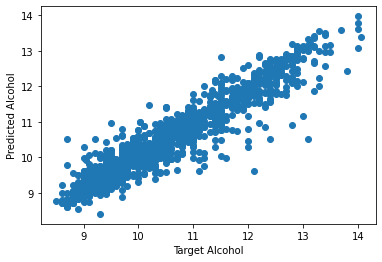

In [40]:
# Import of the module for plotting from Matplotlib
from matplotlib import pyplot as plt
# This is a so-called "magic command" that enables the plots to be displayed directly in the notebook.
# If you forget this, the plots won't show up!
%matplotlib inline

# You can generate predictions of a model with the predict () method
y_predicted = svr_model.predict(X_test)

# Plot the sizes against each other in the scatter plot
plt.scatter(y_test, y_predicted)
plt.xlabel("Target Alcohol")
plt.ylabel("Predicted Alcohol")

The target-response plot does not show a perfect unit line, but the point cloud is relatively evenly distributed and no strong outliers can be seen. The impression thus coincides with the value of $R^2$ in the test and consequently a good result was achieved.

---
<a id='save_model'></a><div><img src="Images/IMG-new-file-out.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">5. Saving the model</h2>
<p style="position: relative; top: 10px">
The optimally tuned support vector regression is therefore the best examined model. We would therefore like to save it so that the model does not always have to be retrained for future applications. </p>

To do this, we import the ```pickle``` module and write the model and (very important) the object for standardization in a binary file. If we didn't also save the standardizer, a user of our model would not be able to standardize new data and thus make no meaningful predictions!

In [ ]:
# Import the pickle module
import pickle

with open('wine_alcohol_model.pickle', 'wb') as model_file:
     # Write the two objects to the file
     pickle.dump([svr_model, stdScaler], model_file)

If you want to use the model again elsewhere, you can load it directly from the binary file:

In [ ]:
with open('wine_alcohol_model.pickle', 'rb') as model_file:
    # Extract the objects from the file into two new variables
    svr, scaler = pickle.load(model_file)

That's it!

<img src="Images/IMG-xkcd-ballmer.png" alt="Title Banner" style="display: block; margin-left: auto; margin-right: auto; width: 100%; max-width:652px">
Source: <a href="https://xkcd.com/license.html">xkcd</a>

---
<div>Wine data from <a href="http://archive.ics.uci.edu/ml/datasets/Wine">UCI Machine Learning Repository</a></div>
<div>Icons made by <a href="https://www.flaticon.com/authors/swifticons" title="Swifticons">Swifticons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>
<div>Notebook erstellt von Yifei Li und <a href="mailto:simon.stone@tu-dresden.de?Subject=Frage%20zu%20Jupyter%20Notebook%20Titanic" target="_top">Simon Stone</a></div>